In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



In [3]:
## transforming data from txt file string to numpy array

## getting every line without /n seperator
ls = []
with open("data2.txt","r") as f:
    for i in f:
        ls.append(i[:-1].split())

## defining function to turn string line to number list
def numerize(list1):
    numlist =[]
    for i in range(len(list1)):
        numlist.append(float(list1[i]))
    return numlist


##turning data's string lines to numbers
input_Data = []
for i in range(len(ls)):
    input_Data.append(numerize(ls[i]))


In [4]:
## defining to seperate input values and output values (input and target values)
def to_arr(list1):
    arr = []
    output = []
    for i in range(len(list1)):
        arr.append(np.array(list1[i][:-1]))
        output.append(list1[i][-1])
    return arr, output

## seperate input values and output values (input and target values) into list and turning them into numpy array
input_data, output_data = to_arr(input_Data)

input_data, output_data = np.array(input_data), np.array(output_data)

sep = 30
## seperating training and test data <<and turning target data into one hot vector for NN>>
x_train, y_train, x_test, y_test = input_data[:-sep], to_categorical(output_data[:-sep]), input_data[-sep:], to_categorical(output_data[-sep:])


In [7]:
#building single layer model

model = Sequential()
model.add(Dense(3, activation="sigmoid")) ## for classification

model.compile(optimizer=Adam(learning_rate=0.011), loss='mse', metrics="CategoricalAccuracy") #assigning loss and accuracy formulas

model.fit(x= x_train, y= y_train, validation_data=(x_test,y_test),batch_size=20,epochs=150)

model.summary()

Epoch 1/150
6/6 [==============================] - 0s 26ms/step - loss: 0.5295 - categorical_accuracy: 0.4750 - val_loss: 0.5374 - val_categorical_accuracy: 0.4333
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5043 - categorical_accuracy: 0.4750 - val_loss: 0.5001 - val_categorical_accuracy: 0.4333
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4529 - categorical_accuracy: 0.4750 - val_loss: 0.4226 - val_categorical_accuracy: 0.4333
Epoch 4/150
6/6 [==============================] - 0s 5ms/step - loss: 0.3559 - categorical_accuracy: 0.4750 - val_loss: 0.3017 - val_categorical_accuracy: 0.4333
Epoch 5/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2488 - categorical_accuracy: 0.5333 - val_loss: 0.2150 - val_categorical_accuracy: 0.5000
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2008 - categorical_accuracy: 0.6000 - val_loss: 0.2030 - val_categorical_accuracy: 0.4667
Epoch 7/150
6/6 [====

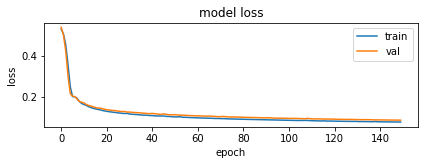

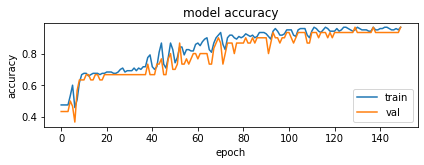

In [8]:
##plotting details

plt.subplot(212)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

plt.subplot(212)
plt.plot(model.history.history['categorical_accuracy'])
plt.plot(model.history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.tight_layout()
plt.show()


In [9]:
## merging two data to evaluate
x_data = np.concatenate((x_train,x_test))
y_data = np.concatenate((y_train,y_test))

model.evaluate(x_data,y_data)

5/5 [==============================] - 0s 600us/step - loss: 0.0791 - categorical_accuracy: 0.9667


[0.07914169132709503, 0.9666666388511658]